In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/DS-FinalESD

/content/drive/MyDrive/DS-FinalESD


In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('HISP.csv')
df = df[(df['round'] == 'Before')]

In [7]:
df['round'].unique()

array(['Before'], dtype=object)

In [8]:
relevant_features = ['poverty_index', 'age_hh', 'age_sp', 'educ_hh', 'educ_sp', 'female_hh', 'indigenous', 'hhsize', 'dirtfloor', 'bathroom', 'land', 'hospital_distance', 'park', 'sports']
X, y = df[relevant_features], df[['health_expenditures']]

## Statistics of the dataset

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9913 entries, 0 to 19825
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   poverty_index      9913 non-null   float64
 1   age_hh             9913 non-null   float64
 2   age_sp             9913 non-null   int64  
 3   educ_hh            9913 non-null   float64
 4   educ_sp            9913 non-null   float64
 5   female_hh          9913 non-null   int64  
 6   indigenous         9913 non-null   int64  
 7   hhsize             9913 non-null   int64  
 8   dirtfloor          9913 non-null   int64  
 9   bathroom           9913 non-null   int64  
 10  land               9913 non-null   int64  
 11  hospital_distance  9913 non-null   float64
 12  park               9913 non-null   float64
 13  sports             9913 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 1.1 MB


In [10]:
X.describe()

,poverty_index,age_hh,age_sp,educ_hh,educ_sp,female_hh,indigenous,hhsize,dirtfloor,bathroom,land,hospital_distance,park,sports
count,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000
mean,56.790404,46.200353,40.183900,2.833289,2.617573,0.099062,0.352870,5.178553,0.603652,0.615959,2.079492,105.319595,2.518121,5.524362
std,10.685997,15.285329,12.794188,2.754699,2.543095,0.298760,0.477887,2.195223,0.489163,0.486392,3.133165,42.063589,1.437306,2.870390
min,20.479134,14.000000,14.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,9.465392,0.001000,1.000000
25%,49.652241,34.000000,30.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,72.804218,1.278000,3.000000
50%,56.414219,45.000000,41.000000,2.000000,2.000000,0.000000,0.000000,5.000000,1.000000,1.000000,1.000000,113.556497,2.541000,6.000000
75%,62.905720,57.000000,47.000000,4.000000,4.000000,0.000000,1.000000,7.000000,1.000000,1.000000,3.000000,141.097735,3.749000,8.000000
max,100.000000,88.000000,87.000000,16.000000,17.000000,1.000000,1.000000,13.000000,1.000000,1.000000,23.000000,170.457647,5.008000,10.000000


In [11]:
y.describe()

,health_expenditures
count,9913.000000
mean,17.210985
std,5.588098
min,6.252154
25%,13.021940
50%,16.839489
75%,21.053459
max,35.626358


###We check that there are no unknown variables in the dataset.



In [12]:
X.isnull().sum()

poverty_index        0
age_hh               0
age_sp               0
educ_hh              0
educ_sp              0
female_hh            0
indigenous           0
hhsize               0
dirtfloor            0
bathroom             0
land                 0
hospital_distance    0
park                 0
sports               0
dtype: int64

###Copy the data, labels before applying some transformations.

In [13]:
X_copy, y_copy = X.copy(), y.copy()

###Observation of the distribution of data for binary variables.

Text(0, 0.5, 'Frequency')

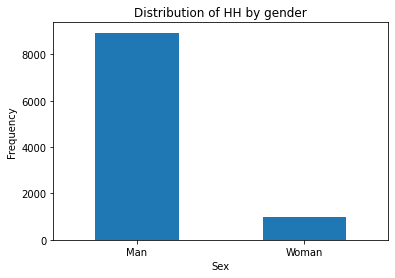

In [14]:
labels = ['Man', 'Woman']
hh_woman = pd.value_counts(df['female_hh'], sort=True)
hh_woman.plot(kind = 'bar', rot=0)
plt.title("Distribution of HH by gender")
plt.xticks(range(2), labels)
plt.xlabel('Sex')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

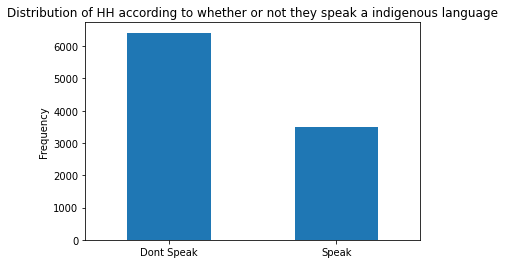

In [15]:
labels = ['Dont Speak', 'Speak']
indigenous = pd.value_counts(df['indigenous'], sort=True)
indigenous.plot(kind = 'bar', rot=0)
plt.title("Distribution of HH according to whether or not they speak a indigenous language")
plt.xticks(range(2), labels)
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

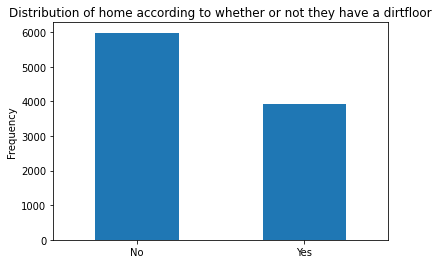

In [16]:
labels = ['No', 'Yes']
hh_woman = pd.value_counts(df['dirtfloor'], sort=True)
hh_woman.plot(kind = 'bar', rot=0)
plt.title("Distribution of home according to whether or not they have a dirtfloor")
plt.xticks(range(2), labels)
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

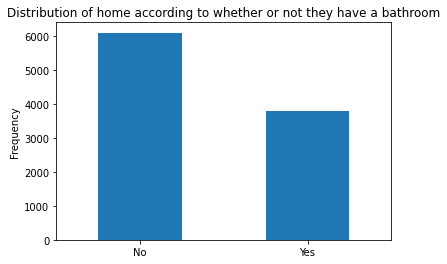

In [17]:
labels = ['No', 'Yes']
hh_woman = pd.value_counts(df['bathroom'], sort=True)
hh_woman.plot(kind = 'bar', rot=0)
plt.title("Distribution of home according to whether or not they have a bathroom")
plt.xticks(range(2), labels)
plt.ylabel('Frequency')

## Training of a linear model

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, test_size = 0.2)

A recheck plus tard...

We will apply two types of transformations 

*   Standardization for continuous variable
*   Binning for ordinal values



In [122]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import linear_model as lm

transformations = Pipeline([
    ('scaler', StandardScaler()), 
    ('poly', PolynomialFeatures(4))
    ])

X_train_prepared = transformations.fit_transform(X_train)
X_test_prepared = transformations.transform(X_test)

In [123]:
from sklearn import linear_model as lm

mod = lm.LinearRegression()
mod.fit(X_train_prepared, y_train)
train_preds = mod.predict(X_train_prepared)
preds = mod.predict(X_test_prepared)

In [124]:
def RMSE(preds, labels):
  return np.sqrt(((preds-labels)**2).mean())

In [126]:
RMSE(train_preds, y_train.to_numpy())

0.47157735674834733

In [146]:
RMSE(preds, y_test.to_numpy())

794384449.2676344

In [147]:
mod.coef_.shape

(1, 3060)

In [148]:
mod.intercept_

array([1.09122329e+11])

To avoid overfitting without using the test set we can regularise our model in such a way as to make it more generalizable to new data.

In [149]:
reg = lm.Ridge(alpha=1)
reg.fit(X_train_prepared, y_train)
train_preds_reg = reg.predict(X_train_prepared)
test_preds_reg = reg.predict(X_test_prepared)

In [150]:
RMSE(train_preds_reg, y_train.to_numpy())

0.47158862015350433

In [151]:
RMSE(test_preds_reg, y_test.to_numpy())

1.1416398893748785

In [152]:
reg.coef_

array([[ 0.        ,  0.17429636,  0.30114318, ...,  0.00838189,
         0.0048067 , -0.01420359]])

In [153]:
reg.intercept_

array([18.22158248])

Here, we check how much each attributes correlates with the **healt expenditures** variable to analyse the importance of the variables on the target one.

In [96]:
check_corr = df[['poverty_index', 'age_hh', 'age_sp', 'educ_hh', 'educ_sp', 'female_hh', 'indigenous', 'hhsize', 'dirtfloor', 'bathroom', 'land', 'hospital_distance', 'park', 'sports', 'health_expenditures']]
corr_matrix = check_corr.corr()
corr_matrix['health_expenditures'].sort_values(ascending=False)

health_expenditures    1.000000
poverty_index          0.559055
age_hh                 0.379201
female_hh              0.279530
age_sp                 0.278128
land                   0.120880
bathroom               0.040592
sports                -0.001626
park                  -0.008692
educ_sp               -0.031894
educ_hh               -0.054454
hospital_distance     -0.072443
indigenous            -0.301266
dirtfloor             -0.306881
hhsize                -0.831935
Name: health_expenditures, dtype: float64

## 2ème partie : Training and performances of a random forest regressor 

!!!Here do same transformations than for the linear model!!!

To find the best set of hyperparameters for our model we consider of Grid Search approach on two parameters : 

*   n_estimators : which corresponds to the number of trees in the forest
*   max_depth : wich corresponds to the maximum depth of the tree



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [100, 125, 150, 200],
              'max_depth':[None,3,4,5]}

rf_regressor = RandomForestRegressor()
clf = GridSearchCV(rf_regressor, parameters)
clf.fit(X_train_prepared, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [100, 125, 150, 200]})

In [ ]:
clf.best_params_

{'max_depth': 5, 'n_estimators': 125}

In [ ]:
best_reg = RandomForestRegressor(max_depth=5, n_estimators=125)
best_reg.fit(X_train_prepared, y_train)
rg_preds = best_reg.predict(X_train_prepared)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
RMSE(rg_preds,y_train.to_numpy())

7.657385338613319

plot training/val curves